<a href="https://colab.research.google.com/github/bhuvnk/EVA/blob/master/Assignment19/Top_4_anchor_boxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering for Top 4 Anchor Boxes

In [0]:
import json
from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt

## Importing the region data json

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
filename = "/content/drive/My Drive/EVA2019/Session19 VGG_Kmeans YOLOp1/via_region_data.json"

with open(filename, 'r') as f:
    datastore = json.load(f)

In [0]:
datastore.values()

dict_values([{'filename': 'img_001.jpg', 'size': 28798, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 117, 'y': 63, 'width': 53, 'height': 149}, 'region_attributes': {'class': 'Right'}}, {'shape_attributes': {'name': 'rect', 'x': 251, 'y': 95, 'width': 49, 'height': 163}, 'region_attributes': {'class': 'Left'}}], 'file_attributes': {}}, {'filename': 'img_002.jpg', 'size': 23916, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 136, 'y': 27, 'width': 56, 'height': 151}, 'region_attributes': {'class': 'Front'}}, {'shape_attributes': {'name': 'rect', 'x': 285, 'y': 109, 'width': 44, 'height': 99}, 'region_attributes': {'class': 'Front'}}, {'shape_attributes': {'name': 'rect', 'x': 196, 'y': 76, 'width': 52, 'height': 117}, 'region_attributes': {'class': 'Front'}}], 'file_attributes': {}}, {'filename': 'img_003.jpg', 'size': 33513, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 165, 'y': 32, 'width': 27, 'height': 59}, 'region_attributes': {'class': 'Right'}}, {'shap

## Parsing just the region dimensions Only width and Height

In [0]:
height_list = []
width_list = []
count_obj = 0
for i in datastore.values():
    #print(len(i[]))
    for j in range(len(i["regions"])):
      c_dict = i["regions"][j]["shape_attributes"]
      width_list.append(c_dict["width"]/400)
      height_list.append(c_dict["height"]/400)

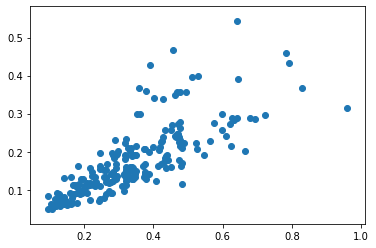

In [0]:
# Having a look at the height and width data
X = np.column_stack((height_list, width_list))
plt.scatter(X[:,0],X[:,1])

## Using KMeans clustering to find 4 best clusters and getting the centroids values

In [0]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

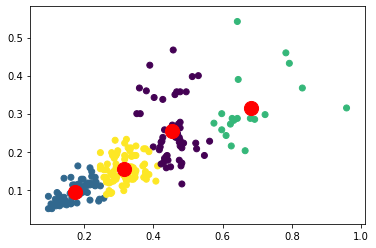

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200)

plt.show()

## Top 4 Anchor Sizes NOrmalized to Image size

In [0]:
centers

array([[0.45514423, 0.25423077],
       [0.17503472, 0.09277778],
       [0.68105263, 0.31578947],
       [0.3168125 , 0.15559375]])

## In absolute Pixel Values

In [0]:
(centers*400).astype(int)

array([[182, 101],
       [ 70,  37],
       [272, 126],
       [126,  62]])